# Рынок недвижимости в России 2018-2021

## 1. Загрузка и описание данных 

Загружаем необходимые для работы библиотеки

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

pd.options.mode.chained_assignment = None  # отключаем предупреждения Pandas

Загружаем данные, скачанные по ссылке: https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021

In [5]:
aparts = pd.read_csv('all_v2.csv')

In [6]:
aparts.head(10)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
5,3300000,2018-03-02,21:18:42,55.908253,37.726448,81,1,4,5,1,32.0,6.0,1
6,4704280,2018-03-04,12:35:25,55.621097,37.431002,3,2,1,25,1,31.7,6.0,11
7,3600000,2018-03-04,20:52:38,59.875526,30.395457,2661,1,2,5,1,31.1,6.0,1
8,3390000,2018-03-05,07:07:05,53.195031,50.106952,3106,2,4,24,2,64.0,13.0,11
9,2800000,2018-03-06,09:57:10,55.736972,38.846457,81,1,9,10,2,55.0,8.0,1


In [7]:
# сводная информация о наборе
aparts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


### Features and data types

**Categorical features:**
- **Region** (numerically encoded geographical area, identifies either a large city like Moscow or Saint Petersburg or a federal region / district)
- **Building type** (numerically encoded type of building materials: 0 - Other, 1 - Panel, 2 - Monolithic, 3 - Brick, 4 - Blocky, 5 - Wooden)
- **Object type** (apartment type: 1 - secondary real estate market, 11 - new building)

**Numerical features:**
- **Area** (total floor area of the apartment in sq. meters)
- **Kitchen area** (kitchen area in sq. meters)
- **Rooms** (number of rooms in the apartment, -1 stands for studios with open-space layout)
- **Level** (floor the apartment is located on, could be treated as a categorical feature as well)
- **Levels** (total number of storeys in the building)

**Geospatial features:**
- **Latitude** (geographical coordinate of the preperty)
- **Longitude** (geographical coordinate of the preperty)

**Temporal features:**
- **Date** (date the listing was published)
- **Time** (exact time the listing was published)

-------

## 2. Очистка и подготовка данных

In [8]:
# описание данных
aparts.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
std,2.150752e+07,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


**Видим, что данные содержат ошибки и выбросы:**
- строки с отрицательной ценой
- слишком дорогое жилье (более 2 млрд руб)
- количество комнат "-2", что не заявлено в описании
- нереалистично маленькая площадь жилья (меньше 1 кв м)
- площадь кухни больше площади всего объекта

In [9]:
# рассчитаем 99-процентиль для цены, площади объекта и площади кухни (поймем, какие значения покрывают 99% выборки)
print("Мин. цена:", np.percentile(aparts['price'], 1))
print("Макс. цена:", np.percentile(aparts['price'], 99))
print("Мин. площадь:", np.percentile(aparts['area'], 1))
print("Макс. площадь:", np.percentile(aparts['area'], 99))
print("Макс. площадь кухни:", np.percentile(aparts['kitchen_area'], 1))
print("Мин. площадь кухни:", np.percentile(aparts['kitchen_area'], 99))

Мин. цена: 750000.0
Макс. цена: 24100000.0
Мин. площадь: 19.8
Макс. площадь: 138.2
Макс. площадь кухни: 2.0
Мин. площадь кухни: 30.5


**Ограничим выборку данных более реалистичными параметрами, которые покрывают большинство объектов на рынке недвижимости**

In [10]:
# диапазон цен на объект
min_price = 750000 
max_price = 30000000

# диапазон площади объекта
min_area = 20  
max_area = 140

# диапазон площади кухни
min_kitchen = 2 
max_kitchen = 30

In [11]:
# отберем объекты по диапазону цены и сразу отсечем отрицательные цены
aparts = aparts[(aparts['price'] <= max_price) & (aparts['price'] >= min_price)]

# отберем объекты по диапазону площади
aparts = aparts[(aparts['area'] <= max_area) & (aparts['area'] >= min_area)]

# отберем объекты по диапазону площади кухни 
aparts = aparts[(aparts['kitchen_area'] <= max_kitchen) & (aparts['kitchen_area'] >= min_kitchen)]

# удалим строки, где площадь кухни больше площади объекта
aparts = aparts[aparts['area'] > aparts['kitchen_area']]

# перезапишем значения -1 и -2 для студий на значение 0
aparts['rooms'] = aparts['rooms'].apply(lambda x: x if x > 0 else 0)

**Проверим результат очистки**

In [12]:
# получить описание очищенных данных
aparts.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06
mean,3.998659e+06,5.400872e+01,5.331684e+01,4.323543e+03,1.937034e+00,6.247051e+00,1.146507e+01,1.768445e+00,5.251934e+01,1.033744e+01,3.984381e+00
std,3.317454e+06,4.616269e+00,2.075884e+01,3.308654e+03,1.035054e+00,4.946453e+00,6.507705e+00,9.200799e-01,1.911572e+01,4.392703e+00,4.575728e+00
min,7.500000e+05,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+01,2.000000e+00,1.000000e+00
25%,1.960000e+06,5.336503e+01,3.779475e+01,2.661000e+03,1.000000e+00,3.000000e+00,5.000000e+00,1.000000e+00,3.860000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.515787e+01,4.344519e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.730000e+06,5.616522e+01,6.651436e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.300000e+01,1.240000e+01,1.100000e+01
max,3.000000e+07,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,9.000000e+00,1.400000e+02,3.000000e+01,1.100000e+01


**Проверим наличие дубликатов**

In [13]:
# посмотрим количество одинаковых записей
aparts.duplicated().sum()

1498

In [14]:
# удалим продублированные записи
aparts = aparts[aparts.duplicated() == False]
aparts.duplicated().sum()

0

**Проверим пропуски данных**

In [15]:
aparts.isnull().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

**Для наглядности восприятия добавим названия регионов в соответствии и их кодами**

In [16]:
# посмотрим, что находится в столбце region
# получить информацию о столбце region
print(aparts['region'].info())

<class 'pandas.core.series.Series'>
Int64Index: 5243013 entries, 0 to 5477005
Series name: region
Non-Null Count    Dtype
--------------    -----
5243013 non-null  int64
dtypes: int64(1)
memory usage: 80.0 MB
None


In [17]:
# получим массив уникальных значений
print(aparts['region'].unique())

# создадим массив numpy со значениями из столбца region
regs = np.array(aparts['region'])

[ 2661    81  2871  2843     3  3106  2922  2900  2722  6171  3230  4417
  5282  5368  3446  5520  6817  9579  2604  1010  9648  7793 13919  2860
  3019  4982  5241  3870  3991  2359  9654  2072  8090  4007 11171 10160
  7873  2594  8509 11416 11991  5178 13913  6309  5952  6543  2880  5993
  2484  4240  5789 14880  1491  2885  5794  2528  4374  4695  2328  5143
  6937  2806 14368  5736  7121  4086   821 10582  7896  8640  5703 10201
  4249  3153  4189  2814 13098  8894  7929 16705    69  4963  1901 61888]


Пользуясь поиском названия регионов по координатам ('geo_lat', 'geo_lon'), выпишем все значения в словарь 'region_name'в соответствии с номером региона ('region') в нашей таблице

In [18]:
region_name = {                     
    2661: 'Санкт-Петербург',
    3446: 'Ленинградская область', 
    3: 'Москва',
    81: 'Московская область',
    2843: 'Краснодарский край',
    2871: 'Нижегородская область',
    3230: 'Ростовская область',
    3106: 'Самарская область',
    2922: 'Республика Татарстан',
    2900: 'Ставропольский край',
    2722: 'Республика Башкортостан',
    6171: 'Свердловская область', 
    4417: 'Республика Коми', 
    5282: 'Челябинская область', 
    5368: 'Иркутская область', 
    5520: 'Пермский край', 
    6817: 'Алтайский край',
    9579: 'Республика Бурятия',
    2604: 'Ярославская область',
    1010: 'Удмуртская Республика',
    7793: 'Псковская область',
    13919: 'Республика Северная Осетия — Алания',
    2860: 'Кемеровская область',
    3019: 'Чувашская Республика',
    4982: 'Республика Марий Эл',
    9648: 'Кабардино-Балкарская Республика',
    5241: 'Республика Мордовия',
    3870: 'Красноярский край',
    3991: 'Тюменская область',
    2359: 'Республика Хакасия',
    9654: 'Новосибирская область',
    2072: 'Воронежская область',
    8090: 'Республика Карелия',
    4007: 'Республика Дагестан',
    11171: 'Республика Саха (Якутия)',
    10160: 'Забайкальский край',
    7873: 'Республика Крым',
    6937: 'Республика Крым',
    2594: 'Кировская область',
    8509: 'Республика Калмыкия',
    11416: 'Республика Адыгея',
    11991: 'Карачаево-Черкесская Республика',
    5178: 'Республика Тыва',
    13913: 'Республика Ингушетия',
    6309: 'Республика Алтай',
    5952: 'Белгородская область',
    6543: 'Архангельская область',
    2880: 'Тверская область',
    5993: 'Пензенская область',
    2484: 'Ханты-Мансийский автономный округ',
    4240: 'Липецкая область',
    5789: 'Владимирская область',
    14880: 'Ямало-Ненецкий автономный округ',
    1491: 'Рязанская область',
    2885: 'Чеченская Республика',
    5794: 'Смоленская область',
    2528: 'Саратовская область',
    4374: 'Вологодская область',
    4695: 'Волгоградская область',
    2328: 'Калужская область',
    5143: 'Тульская область',
    2806: 'Тамбовская область',
    14368: 'Мурманская область',
    5736: 'Новгородская область',
    7121: 'Курская область',
    4086: 'Хабаровский край',
    821: 'Брянская область',
    10582: 'Астраханская область',
    7896: 'Калининградская область',
    8640: 'Омская область',
    5703: 'Курганская область',
    10201: 'Томская область',
    4249: 'Ульяновская область',
    3153: 'Оренбургская область',
    4189: 'Костромская область',
    2814: 'Орловская область',
    13098: 'Камчатский край',
    8894: 'Ивановская область',
    7929: 'Амурская область',
    16705: 'Магаданская область',
    69: 'Еврейская автономная область',
    4963: 'Приморский край',
    1901: 'Сахалинская область',
    61888: 'Ненецкий автономный округ'
}

In [19]:
# сравним длины полученного словаря и количество уникальных значений в region 
print(len(region_name))
print(len(aparts['region'].unique()))

84
84


In [20]:
# проверяем, какого региона нет в списке
for reg in aparts['region'].unique():
    if reg not in region_name:
        print(reg)
print('Проверка завершена')      

Проверка завершена


In [21]:
# созданим серию из словаря регионов
reg_names = pd.Series(region_name)
reg_names

2661                  Санкт-Петербург
3446            Ленинградская область
3                              Москва
81                 Московская область
2843               Краснодарский край
                     ...             
16705             Магаданская область
69       Еврейская автономная область
4963                  Приморский край
1901              Сахалинская область
61888       Ненецкий автономный округ
Length: 84, dtype: object

Добавим в таблицу новый столбец с названием региона

In [22]:
aparts['region_name'] = aparts['region'].map(region_name)
aparts.head(10)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,region_name
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1,Санкт-Петербург
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,Московская область
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1,Нижегородская область
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11,Краснодарский край
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1,Московская область
5,3300000,2018-03-02,21:18:42,55.908253,37.726448,81,1,4,5,1,32.0,6.0,1,Московская область
6,4704280,2018-03-04,12:35:25,55.621097,37.431002,3,2,1,25,1,31.7,6.0,11,Москва
7,3600000,2018-03-04,20:52:38,59.875526,30.395457,2661,1,2,5,1,31.1,6.0,1,Санкт-Петербург
8,3390000,2018-03-05,07:07:05,53.195031,50.106952,3106,2,4,24,2,64.0,13.0,11,Самарская область
9,2800000,2018-03-06,09:57:10,55.736972,38.846457,81,1,9,10,2,55.0,8.0,1,Московская область


In [23]:
# итоговое описание данных
aparts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5243013 entries, 0 to 5477005
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
 13  region_name    object 
dtypes: float64(4), int64(7), object(3)
memory usage: 600.0+ MB


In [24]:
aparts.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06
mean,3.998031e+06,5.400828e+01,5.331910e+01,4.323850e+03,1.937100e+00,6.246332e+00,1.146361e+01,1.768478e+00,5.251895e+01,1.033713e+01,3.982773e+00
std,3.316410e+06,4.616495e+00,2.075908e+01,3.308588e+03,1.035086e+00,4.945813e+00,6.506917e+00,9.200801e-01,1.911445e+01,4.392549e+00,4.575019e+00
min,7.500000e+05,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+01,2.000000e+00,1.000000e+00
25%,1.960000e+06,5.336467e+01,3.779568e+01,2.661000e+03,1.000000e+00,3.000000e+00,5.000000e+00,1.000000e+00,3.860000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.515744e+01,4.344792e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.728090e+06,5.616522e+01,6.655145e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.300000e+01,1.240000e+01,1.100000e+01
max,3.000000e+07,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,9.000000e+00,1.400000e+02,3.000000e+01,1.100000e+01


-------

## 3. Анализ данных

**1. Выберем регион для дальнейшей оценки - Московская область**

In [29]:
# выберем данные по нашему региону
aparts_msk = aparts[aparts['region_name'] == "Московская область"]

In [30]:
aparts_msk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490990 entries, 1 to 5476996
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   price            490990 non-null  int64  
 1   date             490990 non-null  object 
 2   time             490990 non-null  object 
 3   geo_lat          490990 non-null  float64
 4   geo_lon          490990 non-null  float64
 5   region           490990 non-null  int64  
 6   building_type    490990 non-null  int64  
 7   level            490990 non-null  int64  
 8   levels           490990 non-null  int64  
 9   rooms            490990 non-null  int64  
 10  area             490990 non-null  float64
 11  kitchen_area     490990 non-null  float64
 12  object_type      490990 non-null  int64  
 13  region_name      490990 non-null  object 
 14  price_per_meter  490990 non-null  float64
dtypes: float64(5), int64(7), object(3)
memory usage: 59.9+ MB


In [31]:
aparts_msk.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price_per_meter
count,4.909900e+05,490990.000000,490990.000000,490990.0,490990.000000,490990.000000,490990.000000,490990.000000,490990.000000,490990.000000,490990.000000,490990.000000
mean,4.725005e+06,55.727550,37.784171,81.0,1.931496,7.048922,12.730817,1.782796,51.374044,10.270399,3.422351,92886.429016
std,2.408330e+06,0.316999,0.551936,0.0,0.879207,5.697716,7.368486,0.844519,17.812904,4.182235,4.284362,35784.908633
min,7.500000e+05,54.324219,35.339229,81.0,0.000000,1.000000,1.000000,0.000000,20.000000,2.000000,1.000000,6658.330000
25%,3.000000e+06,55.570845,37.449445,81.0,1.000000,3.000000,5.000000,1.000000,38.000000,7.000000,1.000000,66500.000000
50%,4.300000e+06,55.746237,37.840315,81.0,2.000000,5.000000,12.000000,2.000000,46.500000,9.700000,1.000000,90401.790000
75%,5.950000e+06,55.910578,38.023216,81.0,3.000000,10.000000,17.000000,2.000000,61.900000,12.000000,1.000000,114257.140000
max,3.000000e+07,56.898722,40.072223,81.0,5.000000,36.000000,39.000000,9.000000,140.000000,30.000000,11.000000,705882.350000


**2. Рассмотрим корреляцию данных**

In [32]:
# корреляция столбцов
aparts_msk.corr()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price_per_meter
price,1.000000,0.074636,-0.241377,NaN,-0.116349,0.316170,0.454119,0.422795,0.646653,0.490754,0.129411,0.665468
geo_lat,0.074636,1.000000,-0.202621,NaN,0.044401,0.040977,0.062788,-0.020801,0.016393,0.032019,0.033160,0.087062
geo_lon,-0.241377,-0.202621,1.000000,NaN,0.048137,-0.102850,-0.153459,0.004147,-0.064943,-0.121989,-0.114051,-0.280883
region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
building_type,-0.116349,0.044401,0.048137,NaN,1.000000,-0.162344,-0.244653,-0.031291,-0.050776,-0.130810,-0.119982,-0.118091
level,0.316170,0.040977,-0.102850,NaN,-0.162344,1.000000,0.681638,-0.062374,0.096276,0.311622,0.313364,0.352170
levels,0.454119,0.062788,-0.153459,NaN,-0.244653,0.681638,1.000000,-0.094454,0.139826,0.451553,0.433352,0.506533
rooms,0.422795,-0.020801,0.004147,NaN,-0.031291,-0.062374,-0.094454,1.000000,0.811185,0.142264,-0.084384,-0.199001
area,0.646653,0.016393,-0.064943,NaN,-0.050776,0.096276,0.139826,0.811185,1.000000,0.443801,-0.006114,-0.073649
kitchen_area,0.490754,0.032019,-0.121989,NaN,-0.130810,0.311622,0.451553,0.142264,0.443801,1.000000,0.356255,0.233362


<AxesSubplot:>

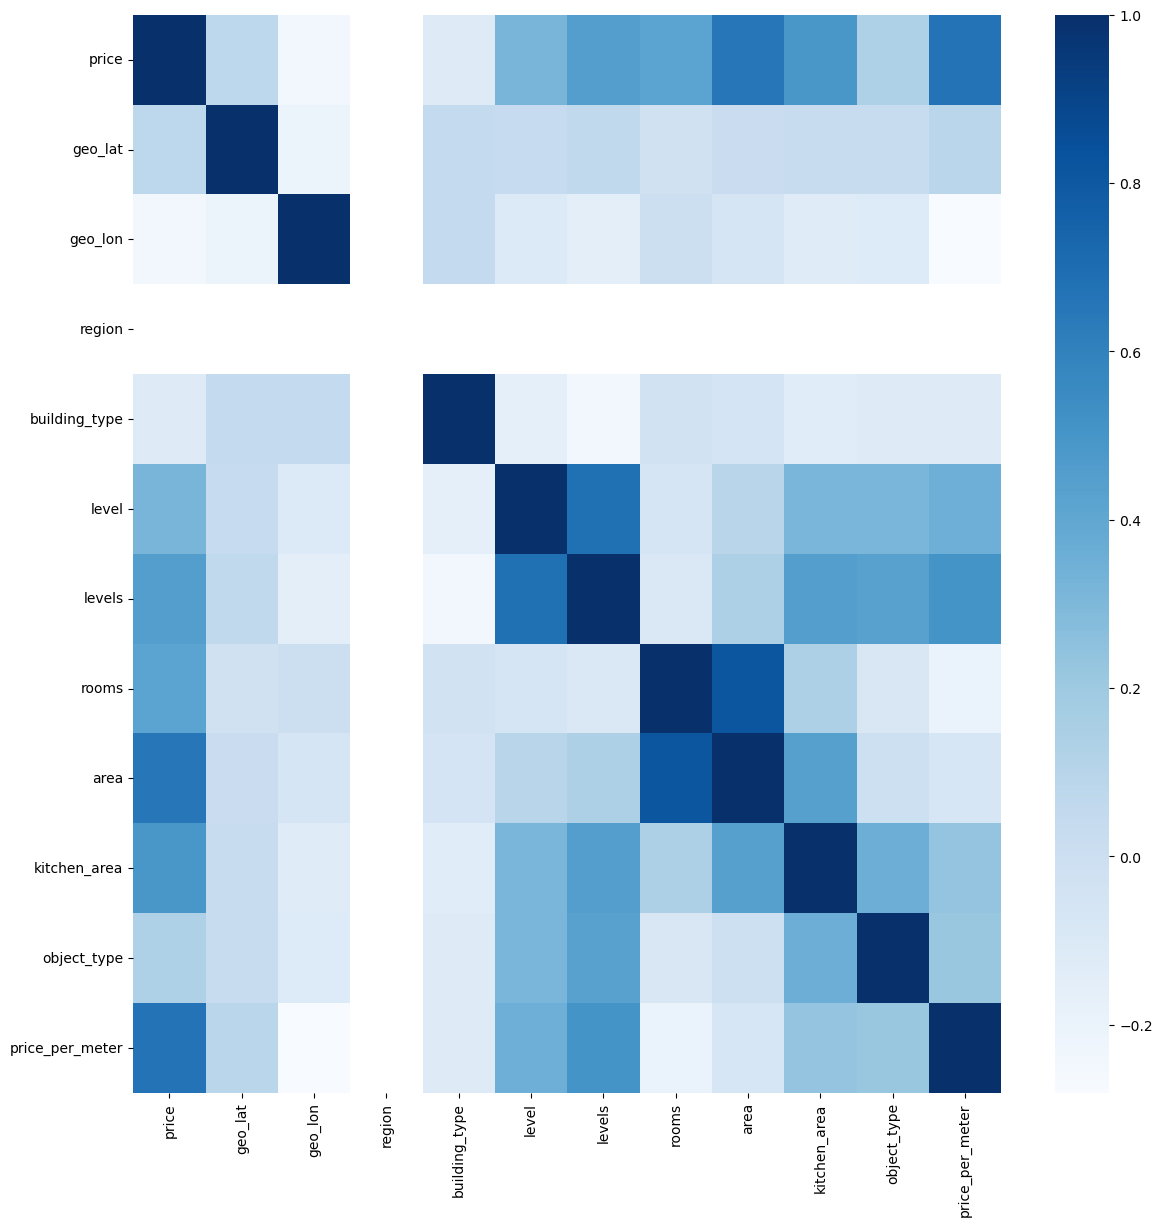

In [33]:
# построим тепловую карту корреляции
plt.figure(figsize=(14, 14))

sns.heatmap(aparts_msk.corr(), cmap="Blues")

Цена объекта больше всего коррелирует с общей площадью объекта, количеством комнат и количеством этажей в здании

**3. Выведем распределение данных: площади, цены, комнат, этажа**

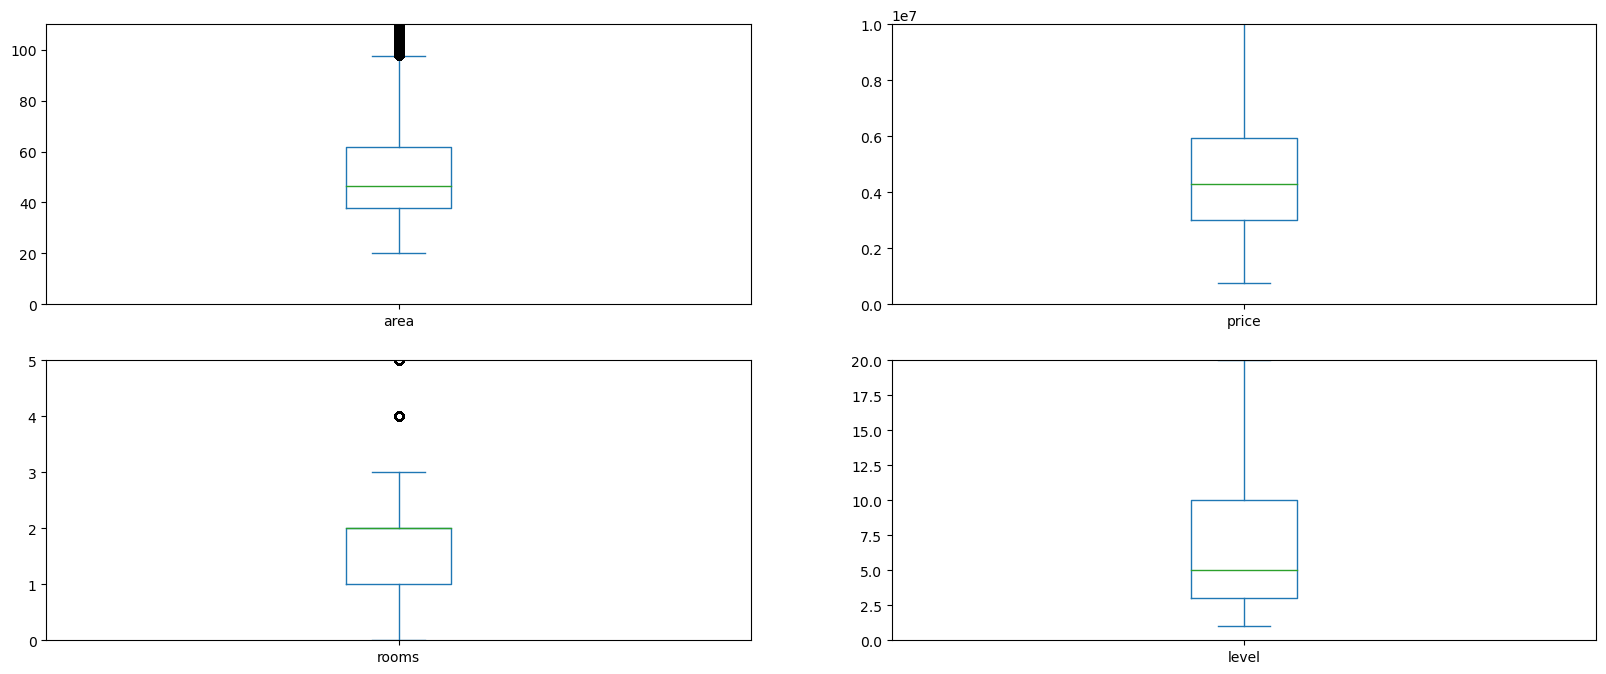

In [34]:
# выбранные поля
column_list1 = ['area', 'price', 'rooms', 'level']
ax = aparts_msk[column_list1].plot(kind='box', subplots=True, layout=(2,2), figsize=(20,8))

# пределы вида по оси Y
ylims = [110, 10000000, 5, 20]

for i in range(len(column_list1)):
    ax[column_list1[i]].set_ylim(0, ylims[i])

**4. Рассмотрим количество объявлений по месяцам**

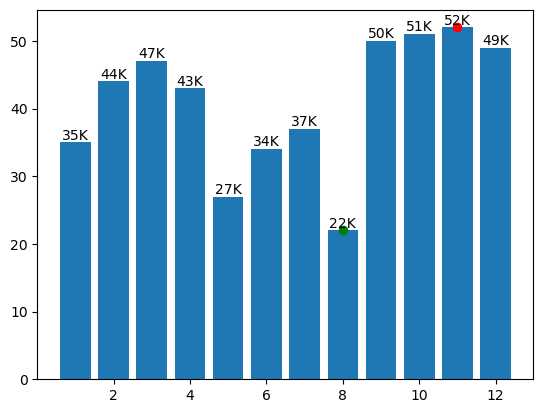

In [85]:
# визуализируем количество объявлений по месяцам
ads = round(aparts_msk.groupby('month')['region'].count()/1000, 0)

bar_ads = plt.bar(ads.index, ads)
plt.bar_label(bar_ads, fmt='%.0fK')

# посчитаем минимальную и максимальную среднюю цену месяца
min_ads = ads.min()
max_ads = ads.max()

# найдем соотвествующие месяцы и добавим точки на график
min_ads_day = ads[ads == min_ads]
max_ads_day = ads[ads == max_ads]

plt.scatter(min_ads_day.index, min_ads, color='g')
plt.scatter(max_ads_day.index, max_ads, color='r')

plt.show()

Видно снижение предложений в летние месяцы с мая по август.

**5. Визуализируем количество объявлений за весь период**

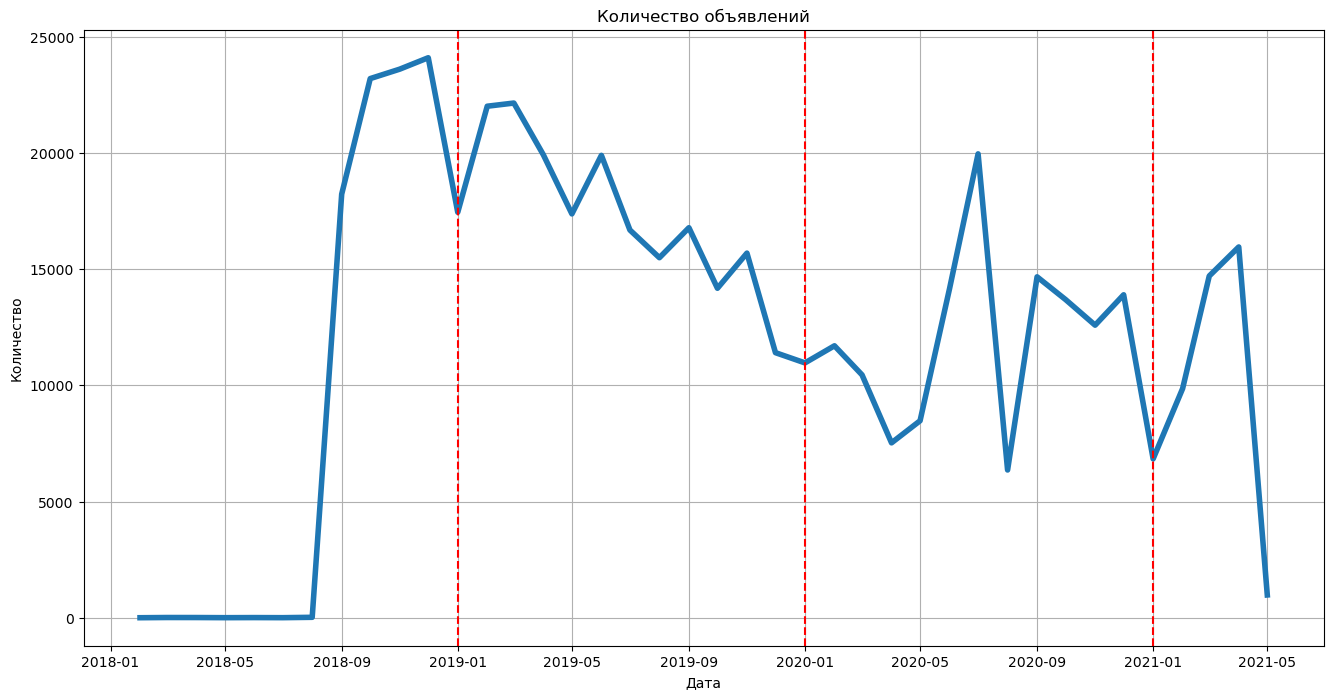

In [181]:
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 1, 1)
xlabels = np.arange('2018-02-01', '2021-06-01', dtype='datetime64[M]')

ax.plot(xlabels, aparts_msk.groupby(['year', 'month'])['region'].count(), linewidth=4)
ax.grid(True)
ax.axvline(x=datetime(2019,1,1), color='r', linestyle='--')
ax.axvline(x=datetime(2020,1,1), color='r', linestyle='--')
ax.axvline(x=datetime(2021,1,1), color='r', linestyle='--')
# ax.set_title('Количество объявлений')
ax.set_xlabel('Дата')
ax.set_ylabel('Количество')
plt.show()

Не прослеживается тренд сезонности по количеству продложений о продаже квартир.

**6. Рассчитаем зависимость средней цены на квадратный метр от даты размещения**

In [27]:
# получим цену за квадратный метр
aparts['price_per_meter'] = round(aparts['price'] / aparts['area'], 2)

In [28]:
aparts.head(10)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,region_name,price_per_meter
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1,Санкт-Петербург,73244.55
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,Московская область,125180.90
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1,Нижегородская область,60606.06
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11,Краснодарский край,48684.21
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1,Московская область,90833.33
5,3300000,2018-03-02,21:18:42,55.908253,37.726448,81,1,4,5,1,32.0,6.0,1,Московская область,103125.00
6,4704280,2018-03-04,12:35:25,55.621097,37.431002,3,2,1,25,1,31.7,6.0,11,Москва,148400.00
7,3600000,2018-03-04,20:52:38,59.875526,30.395457,2661,1,2,5,1,31.1,6.0,1,Санкт-Петербург,115755.63
8,3390000,2018-03-05,07:07:05,53.195031,50.106952,3106,2,4,24,2,64.0,13.0,11,Самарская область,52968.75
9,2800000,2018-03-06,09:57:10,55.736972,38.846457,81,1,9,10,2,55.0,8.0,1,Московская область,50909.09


In [44]:
month_growth = pd.DataFrame()

In [45]:
aparts_msk.sort_values(by='date')

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,region_name,price_per_meter,month,year
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,Московская область,125180.90,2,2018
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1,Московская область,90833.33,3,2018
5,3300000,2018-03-02,21:18:42,55.908253,37.726448,81,1,4,5,1,32.0,6.0,1,Московская область,103125.00,3,2018
9,2800000,2018-03-06,09:57:10,55.736972,38.846457,81,1,9,10,2,55.0,8.0,1,Московская область,50909.09,3,2018
10,6909880,2018-03-06,18:34:48,55.913950,37.707712,81,1,9,14,3,76.1,8.8,11,Московская область,90800.00,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5471000,7732800,2021-05-01,10:24:43,55.796389,37.938283,81,2,15,16,2,53.0,11.8,11,Московская область,145901.89,5,2021
5471001,5132050,2021-05-01,10:24:44,55.545913,37.590000,81,1,19,25,0,21.0,5.6,11,Московская область,244383.33,5,2021
5471002,4150000,2021-05-01,10:24:44,55.743897,36.871728,81,2,1,17,1,32.0,8.5,1,Московская область,129687.50,5,2021
5471085,7530720,2021-05-01,10:28:44,55.796389,37.938283,81,2,13,16,2,54.0,20.5,11,Московская область,139457.78,5,2021


In [118]:
# расчет средней цены по годам и месяцам
month_growth = aparts_msk.groupby(['year', 'month'], as_index=False).agg({'price_per_meter': 'mean'})
# процентное изменение средней цены
month_growth['pct_change'] = month_growth['price_per_meter'].pct_change()

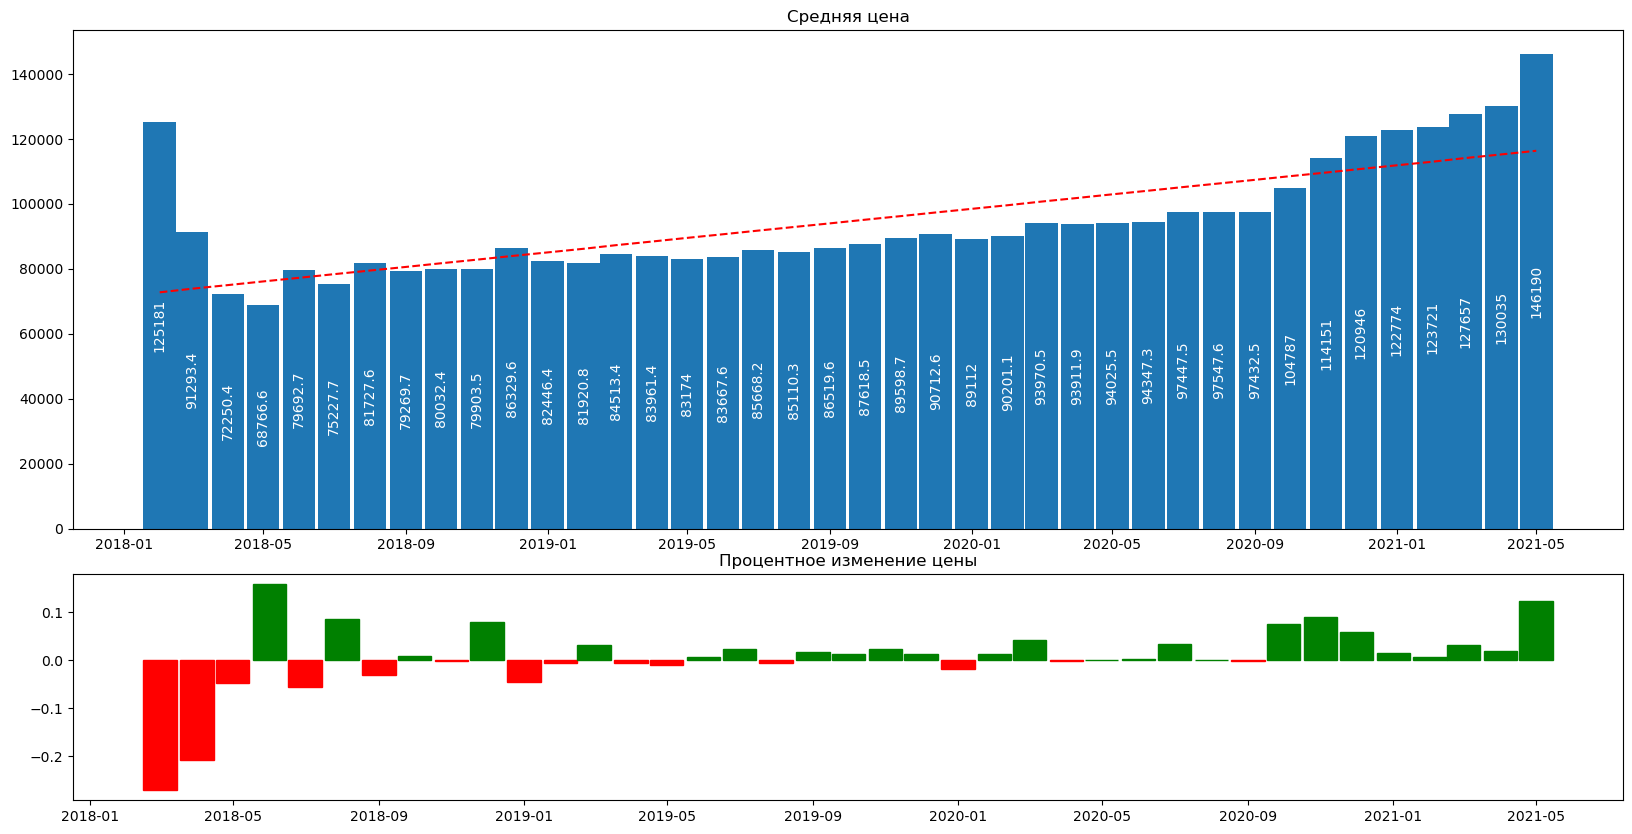

In [169]:
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(nrows=3, ncols=1)

xlabels = np.arange('2018-02-01', '2021-06-01', dtype='datetime64[M]')

facecolors = ['green' if y > 0 else 'red' for y in month_growth['pct_change']]
edgecolors = facecolors

ax1 = fig.add_subplot(gs[2:, :])
ax1.bar(xlabels, month_growth['pct_change'], color=facecolors, edgecolor=edgecolors, width=1)
ax1.set_title('Процентное изменение цены')

ax2 = fig.add_subplot(gs[:2, :])
label2 = ax2.bar(xlabels, month_growth['price_per_meter'], width=1)
ax2.set_title('Средняя цена')
ax2.bar_label(label2, label_type='center', color='white', rotation='vertical')

# добавим линию тренда на график
a, b = np.polyfit(month_growth.index, month_growth['price_per_meter'], deg=1)
y_est = a * month_growth.index + b
ax2.plot(xlabels, y_est, color='r', linestyle="--") 

plt.show()

С 2018 года средняя стоимость квадратного метра непрерывно растет.

**7. Зависимость цены на квадратный метр от числа комнат, площади и этажа**


In [149]:
# расчет средней цены по кол-ву комнат
room_growth = pd.DataFrame()
room_growth = aparts_msk.groupby(['rooms'], as_index=False).agg({'price_per_meter': 'mean'})
room_growth['price_per_meter'] = round(room_growth['price_per_meter'], 0)

# расчет средней площади по кол-ву комнат
area_by_room = pd.DataFrame()
area_by_room = aparts_msk.groupby(['rooms'], as_index=False).agg({'area': 'mean'})
area_by_room['area'] = round(area_by_room['area'], 0)

# расчет средней цены по площади
area_growth = pd.DataFrame()
aparts_msk['round_area'] = round(aparts_msk['area'], -1)
area_growth = aparts_msk.groupby(['round_area'], as_index=False).agg({'price_per_meter': 'mean'})
area_growth['price_per_meter'] = round(area_growth['price_per_meter'], 0)

# расчет средней цены по этажам
level_growth = pd.DataFrame()
level_growth = aparts_msk.groupby(['level'], as_index=False).agg({'price_per_meter': 'mean'})
level_growth['price_per_meter'] = round(level_growth['price_per_meter'], 0)

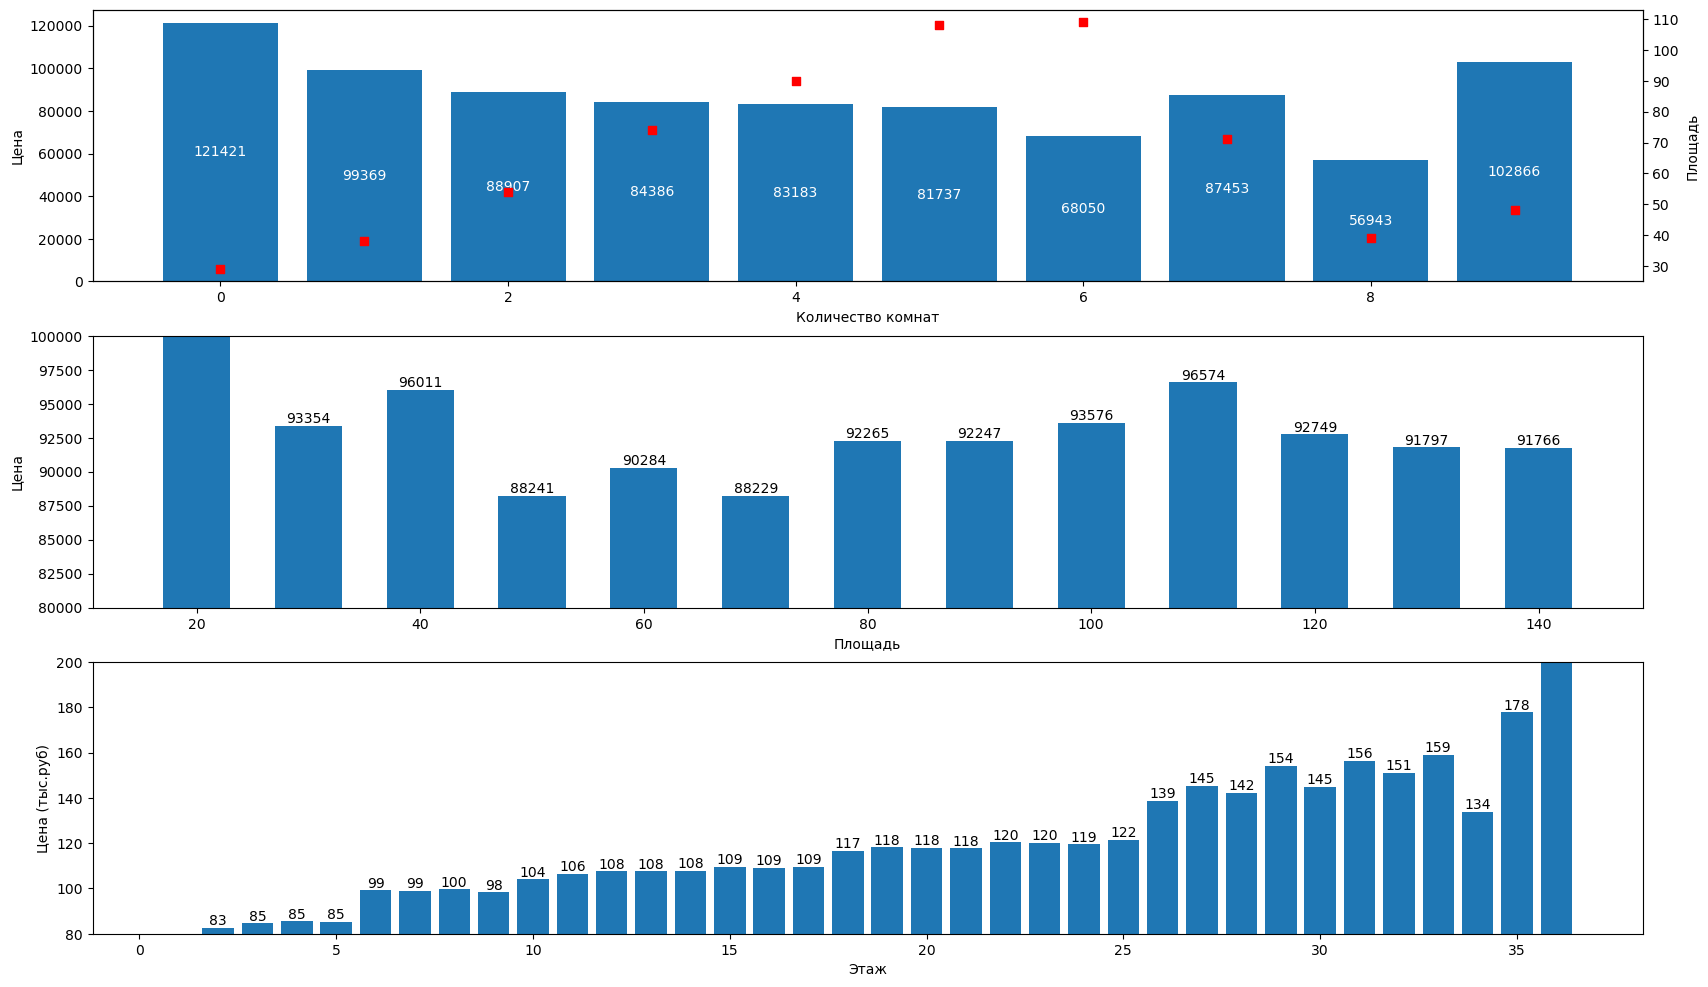

In [183]:
fig = plt.figure(figsize=(20, 12))

ax1 = fig.add_subplot(311)
label_price_room = ax1.bar(room_growth.index, room_growth['price_per_meter'])
ax1.bar_label(label_price_room, label_type='center', color='white')
#ax1.set_title('Средняя цена по количеству комнат')
ax1.set_ylabel('Цена')
ax1.set_xlabel('Количество комнат')

ax11 = ax1.twinx()
label_area_room = ax11.scatter(area_by_room.index, area_by_room['area'], marker='s', color='r')
ax11.set_ylabel('Площадь')

ax2 = fig.add_subplot(312)
label_price_area = ax2.bar(area_growth['round_area'], area_growth['price_per_meter'], width=6)
ax2.bar_label(label_price_area)
#ax2.set_title('Средняя цена по площади')
ax2.set_ylabel('Цена')
ax2.set_xlabel('Площадь')
plt.ylim (80000, 100000)

ax3 = fig.add_subplot(313)
label_price_level = ax3.bar(level_growth['level'], level_growth['price_per_meter']/1000, width=0.8)
ax3.bar_label(label_price_level, fmt='%.0f')
#ax3.set_title('Средняя цена по этажам')
ax3.set_ylabel('Цена (тыс.руб)')
ax3.set_xlabel('Этаж')

plt.ylim (80, 200)
plt.show()

Чем больше комнат, тем ниже стоимость за квадратный метр. Но на графике видно, что цены на объекты с 7 и более комнатами выбиваются из общего тренда. Рассмторим их более подробно.

In [429]:
# сколько объектов с 7 и более комнатами
aparts_msk[aparts_msk['rooms']>=7].shape[0]

18

In [391]:
# вывод всех записей
aparts_msk[aparts_msk['rooms']>=7].head(20)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,region_name,price_per_meter,month,year
14703,4200000,2018-09-10,13:58:50,55.913319,36.876120,81,3,5,9,9,64.0,7.0,1,Московская область,65625.00,9,2018
654849,4000000,2018-12-04,14:06:38,55.081219,38.774327,81,3,9,9,9,68.0,12.0,1,Московская область,58823.53,12,2018
704091,2500000,2018-12-10,17:17:38,55.533150,37.620815,81,2,7,8,9,21.6,5.0,1,Московская область,115740.74,12,2018
1002301,7000000,2019-01-25,14:02:48,55.876077,37.399101,81,1,19,25,7,58.4,17.0,1,Московская область,119863.01,1,2019
1143026,3550000,2019-02-13,21:28:13,54.877480,37.216968,81,3,9,9,9,49.0,8.0,1,Московская область,72448.98,2,2019
1923523,4298620,2019-06-03,08:16:22,55.642708,37.859280,81,2,7,17,7,45.7,12.2,11,Московская область,94061.71,6,2019
2481709,3800000,2019-08-31,20:11:34,55.980387,37.133264,81,1,11,12,9,60.0,12.0,1,Московская область,63333.33,8,2019
2800039,2198000,2019-10-30,06:33:22,55.981716,37.281413,81,1,2,8,8,38.6,12.6,1,Московская область,56943.01,10,2019
3146715,4200000,2020-01-17,15:51:43,55.450694,37.741357,81,3,7,17,7,48.0,12.0,11,Московская область,87500.00,1,2020
3181277,2400000,2020-01-25,13:19:41,56.079639,37.930872,81,3,3,4,9,30.8,6.0,1,Московская область,77922.08,1,2020


Объектов с 7 и более комнатами очень мало, и площади объектов не реалистично малы для указанного количества комнат.



In [ ]:
# расчет средней цены по площади
area_growth = pd.DataFrame()
aparts_msk['round_area'] = round(aparts_msk['area'], -1)
area_growth = aparts_msk.groupby(['round_area'], as_index=False).agg({'price_per_meter': 'mean'})
area_growth['price_per_meter'] = round(area_growth['price_per_meter'], 0)

# расчет средней цены по этажам
level_growth = pd.DataFrame()
level_growth = aparts_msk.groupby(['level'], as_index=False).agg({'price_per_meter': 'mean'})
level_growth['price_per_meter'] = round(level_growth['price_per_meter'], 0)

-------

## 4. Заключение

По выбранному региону Московская область из всего датасета соответствовала выборка в **490990 записей**. Данные предобработаны таким образом, чтобы исключить выбросы и оставить максимально реалистичные записи, **покрывающие 99% объектов недвижимости**.

**Основные выводы:**
* Цена на объект больше всего коррелирует с общей площадью, количеством комнат и этажом размещения в здании.
* Динамика предложений на рынке недвижимости не стабильная. Не прослеживается тренд сезонности продложений о продаже квартир из года в год. Видно **снижение предложений** в летние месяцы **с мая по август**.
* С 2018 года средняя стоимость квадратного метра непрерывно растет. 
* Чем больше комнат, тем ниже стоимость за квадратный метр. Это справедливо для количества комнат от 1 до 6 включительно.
* Зависимость цены от площади объекта можно разделить на 2 условных отрезка: до 40 м2 и от 50 м2. 
     - объекты **до 40 м2** включительно стоят выше среднего значения по региону **92 тыс.руб** и включают в себя как правило студии и однокомнатные квартиры.
     - объекты **от 50 м2** уже стартуют от **88 тыс.руб** и дорожают с ростом общей площади квартиры.
* Также цена прямо зависит от этажа размещения квартиры - **чем выше этаж, тем дороже объект**.